In [12]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('../train.csv')
df_raw = df.copy()
df_raw.head()
## value가 문자 값이지만 등급을 나타내는 feature들 (nan값은 대상이 없음을 의미한다.)
tonum = {"ExterQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "ExterCond": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "BsmtQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "BsmtCond": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "HeatingQC": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "KitchenQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "FireplaceQu": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "GarageQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "GarageCond": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "PoolQC": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "BsmtFinType1" : {'GLQ' : 6, 'ALQ' : 5, 'BLQ': 4,'Rec' : 3,'LwQ' : 2, 'Unf' : 1, np.nan : 0},
         "BsmtFinType2" : {'GLQ' : 6, 'ALQ' : 5, 'BLQ': 4,'Rec' : 3,'LwQ' : 2, 'Unf' : 1, np.nan : 0},
           }
df_raw = df_raw.replace(tonum)
## 그 외 nan값이 모르는 값이 아닌 대상이 없음을 의미 하는 feature들
fill_na_ls = [['GarageType',# NA : 차고 없음 (category)
 'MiscFeature',             # NA : 없음  (category) 기타 범주(엘레베이터, 테이스 코트) 기타 범주
 'Fence',                   # NA : 울타리 없음 (category)
 'GarageFinish',            # NA : 차고 없음 (category)
 'BsmtExposure',            # NA : 지하실 없음
 'Alley',                   # NA : No alley access
]]

for name in fill_na_ls:
    df_raw[name] = df_raw[name].fillna('N')

## 그 외 nan값이 모르는 값이 아닌 대상이 없음을 의미 하는 feature들
fill_na_ls = [['GarageType',# NA : 차고 없음 (category)
 'MiscFeature',             # NA : 없음  (category) 기타 범주(엘레베이터, 테이스 코트) 기타 범주
 'Fence',                   # NA : 울타리 없음 (category)
 'GarageFinish',            # NA : 차고 없음 (category)
 'BsmtExposure',            # NA : 지하실 없음
 'Alley',                   # NA : No alley access
]]

for name in fill_na_ls:
    df_raw[name] = df_raw[name].fillna('N')
# 그래도 남은 Null값들
total = df_raw.isnull().sum().sort_values(ascending=False)
percent = (df_raw.isnull().sum()/df_raw.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
pd.set_option("display.max_rows",None)
missing_data.head()
# Null 값 drop
pd.set_option("display.max_columns",None)
df_raw = df_raw.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_raw = df_raw.drop(df_raw.loc[df_raw['Electrical'].isnull()].index)
# y값에 로그
from scipy import stats
df_raw['SalePrice'] = np.log(df_raw['SalePrice'])
# 1층과 2층 넓이 합침
df_raw['TotFlrSF'] = df_raw['1stFlrSF'] + df_raw['2ndFlrSF']

In [13]:
heat= df_raw.corr()
number_feature = list(heat.index)
cate_feature = []
for col in df_raw.columns:
    if col not in number_feature:
        cate_feature.append(col)
for col in cate_feature:
    model = sm.OLS.from_formula("SalePrice ~ C({})".format(col), data = df_raw)

    result = model.fit()
    print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     77.56
Date:                Tue, 13 Mar 2018   Prob (F-statistic):           1.11e-59
Time:                        20:54:25   Log-Likelihood:                -590.27
No. Observations:                1459   AIC:                             1191.
Df Residuals:                    1454   BIC:                             1217.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            11.1183      0.11

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     23.57
Date:                Tue, 13 Mar 2018   Prob (F-statistic):           1.72e-30
Time:                        20:54:25   Log-Likelihood:                -652.80
No. Observations:                1459   AIC:                             1322.
Df Residuals:                    1451   BIC:                             1364.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     299.0
Date:                Tue, 13 Mar 2018   Prob (F-statistic):          3.35e-151
Time:                        20:54:25   Log-Likelihood:                -380.98
No. Observations:                1459   AIC:                             770.0
Df Residuals:                    1455   BIC:                             791.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 12

In [17]:
df_all = df_raw.copy()#BsmtQual 지하실 높이 등급   TotalBsmtSF 지하실 면적  FireplaceQu 벽난로 품질(등급)   HeatingQC  난방 품질(등급)
model_all = sm.OLS.from_formula("SalePrice ~ scale(OverallQual) + scale(GrLivArea ** 3) + scale(ExterQual ** 2) + scale(KitchenQual) + scale(GarageCars) + scale(TotalBsmtSF) + scale(TotFlrSF) + C(BsmtQual) + C(FireplaceQu) + scale(YearRemodAdd) + C(HeatingQC)", data=df_all) 
 
result_all = model_all.fit()
print(result_all.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     387.0
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:55:13   Log-Likelihood:                 651.43
No. Observations:                1459   AIC:                            -1259.
Df Residuals:                    1437   BIC:                            -1143.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                11.77

In [4]:
df_all = df_raw.copy()#GrLivArea ExterQual 제거
model_all = sm.OLS.from_formula("SalePrice ~ scale(OverallQual) + scale(KitchenQual) + scale(GarageCars) + scale(TotalBsmtSF) + scale(TotFlrSF) + C(BsmtQual) + C(FireplaceQu) + scale(YearRemodAdd) + C(HeatingQC)", data=df_all) 
 
result_all = model_all.fit()
print(result_all.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     373.2
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:31:23   Log-Likelihood:                 566.86
No. Observations:                1459   AIC:                            -1094.
Df Residuals:                    1439   BIC:                            -988.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              11.6631    

In [5]:
df_all = df_raw.copy()#Neighborhood 추가
model_all = sm.OLS.from_formula("SalePrice ~ scale(OverallQual) + scale(KitchenQual) + scale(GarageCars) + scale(TotalBsmtSF) + scale(TotFlrSF) + C(BsmtQual) + C(FireplaceQu) + scale(YearRemodAdd) + C(HeatingQC) + C(Neighborhood)", data=df_all) 
 
result_all = model_all.fit()
print(result_all.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     209.5
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:32:39   Log-Likelihood:                 725.35
No. Observations:                1459   AIC:                            -1363.
Df Residuals:                    1415   BIC:                            -1130.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [6]:
# 아웃라이어 제거
influence = result_all.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (1460 - 1 - 13)
idx = np.where(cooks_d2 > fox_cr)[0]
df_fin = df_all.copy()
df_fin = df_fin.drop(df_fin.index[idx])
#Category : BsmtQual, FireplaceQu, HeatingQC, Neighborhood
df_finr = df_fin.copy()
model_finr = sm.OLS.from_formula("SalePrice ~ scale(OverallQual) + scale(KitchenQual) + scale(GarageCars) + scale(TotalBsmtSF) + scale(TotFlrSF) + C(BsmtQual) + C(FireplaceQu) + scale(YearRemodAdd) + C(HeatingQC) + C(Neighborhood)", data=df_finr) 
result_finr = model_finr.fit()
print(result_finr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     364.3
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:35:19   Log-Likelihood:                 1129.6
No. Observations:                1394   AIC:                            -2175.
Df Residuals:                    1352   BIC:                            -1955.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

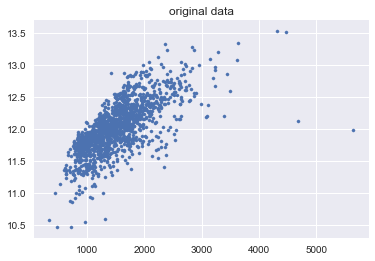

In [7]:
plt.scatter(df_raw['GrLivArea'], df_raw['SalePrice'], s=10)
plt.title("original data")
plt.show()

In [10]:
df_all2 = df_raw.copy()#Neighborhood 추가
model_all2 = sm.OLS.from_formula("SalePrice ~ scale(OverallQual) + scale(GrLivArea ** 2) + scale(KitchenQual) + scale(GarageCars) + scale(TotalBsmtSF) + scale(TotFlrSF) + C(BsmtQual) + C(FireplaceQu) + scale(YearRemodAdd) + C(Neighborhood)", data=df_all2) 
 
result_all2 = model_all2.fit()
print(result_all2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     240.2
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:44:01   Log-Likelihood:                 764.89
No. Observations:                1459   AIC:                            -1448.
Df Residuals:                    1418   BIC:                            -1231.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           